# What is Mean Shift?
***

**평균 이동(Mean Shift)**은 K-Means 처럼 중심을 움직이면서 군집화를 수행합니다. 평균 이동은 K-Means와 달리 중심을 데이터의 **밀도가 가장 높은 곳**으로 이동시킵니다. 평균 이동은 밀도가 가장 높은 지역을 찾기 위해 **KDE(Kernel Density Estimation)**를 이용합니다. KDE를 활용해 밀도가 가장 높은 대역폭을 만들어내는 중심 포인트를 찾아갑니다. 

이로 인해 평균 이동은 군집의 개수를 초기에 정할 필요가 없습니다. 하지만 **대역폭 크기의 설정 값**에 따라서 군집화의 품질이 결정됩니다. 바로 실습에 들어가보겠습니다.

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [40]:
X, y = make_blobs(n_samples = 300, n_features = 2, centers = 4, cluster_std = .75, random_state = 210)

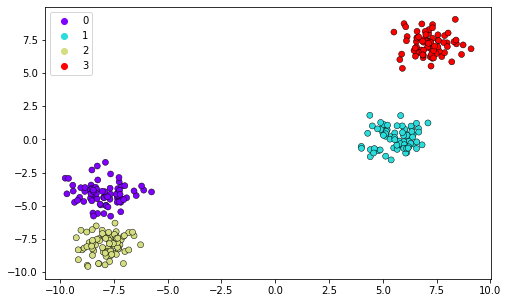

In [41]:
plt.figure(figsize = (8 ,5))
sns.scatterplot(X[:, 0], X[:, 1], hue = y, edgecolor = (0, 0, 0), palette = 'rainbow')
plt.show()

In [42]:
ms = MeanShift(bandwidth = .9)
label = ms.fit_predict(X)

In [43]:
print('label 종류 ', np.unique(label))

label 종류  [0 1 2 3 4 5 6]


In [44]:
ms = MeanShift(bandwidth = .6)
label = ms.fit_predict(X)

In [45]:
print('label 종류 ', np.unique(label))

label 종류  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


bandwith 값에 따라서 군집화 개수가 달라지는데요 bandwith 값을 최적화 할 수 있는 방법이 있습니다. estimate_bandwith은 최적화 된 bandwith 값을 반환해줍니다.

In [46]:
from sklearn.cluster import estimate_bandwidth

In [47]:
bw = estimate_bandwidth(X, quantile = .2)

In [48]:
print('적정 bandwith 값 : ', bw)

적정 bandwith 값 :  1.7944419063639616


In [49]:
best_ms = MeanShift(bandwidth = bw)
label = best_ms.fit_predict(X)

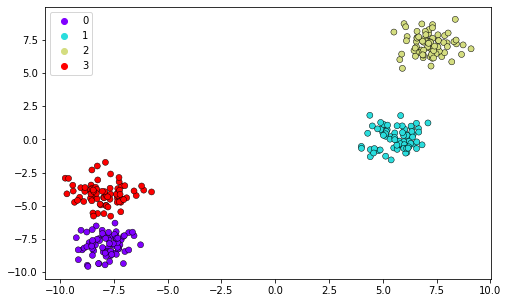

In [50]:
plt.figure(figsize = (8 ,5))
sns.scatterplot(X[:, 0], X[:, 1], hue = label, edgecolor = (0, 0, 0), palette = 'rainbow')
plt.show()

평균 이동은 다른 알고리즘 보다 상대적으로 유연한 군집화가 가능하다는 장점이 있습니다. 또한 이상치의 영향을 덜 받으며 미리 군집의 개수를 정할 필요도 없습니다. 하지만 수행 시간이 오래걸리고 bandwith 값에 따라서 군집화의 영향도가 매우 크다고 할 수 있습니다.

지금까지 평균 이동 기법에 대해서 알아보았습니다. 다음 챕터에서는 GMM(Gaussian Mixture Model)에 대해서 알아보도록 하겠습니다. 감사합니다.